<a href="https://colab.research.google.com/github/Rus8921/Work_with_data/blob/main/%D0%94%D0%97_1_%D0%9D%D0%B0%D1%87%D0%B0%D0%BB%D0%BE_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%D1%81_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек

In [1]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

# Загрузка данных на Google Drive

In [14]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean.csv


# Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [15]:
df = pd.read_csv('/content/cars_moldova_clean.csv') 
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [18]:
cat_columns = []#  создаем два списка в ктороые заносим данные разных типов и подсчитываем их, один- категориальные данные (тип object), остальные - числовые 
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year'] 
 Число столблцов =  6


рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

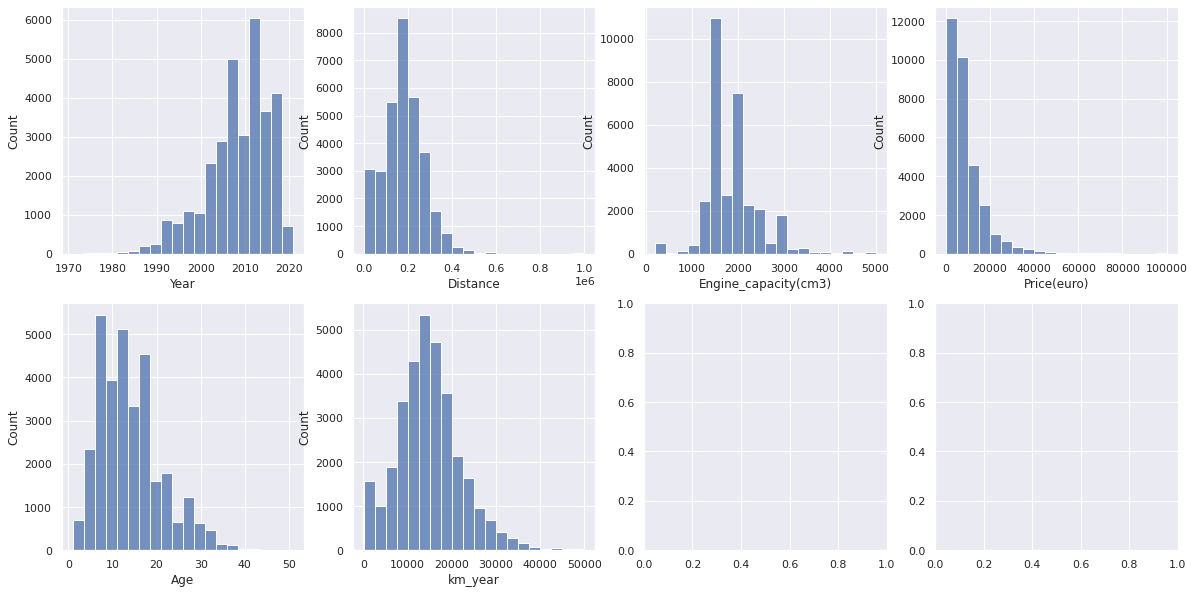

In [19]:
width = 4
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,10)) # в фиг сайз мы задаем размеры самой картинки, в height -  мы задаем сколько графиков у нас будет в высоту(в данном случае кол-во столбцов с числовыми данными / width )
# width -  сколько графиклв у нас будет в ширину  
# задаем параметры графиков ну  и sns.histplot - это тип графика, а именно гистограмма 
for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

Посмотрим на scaterplot

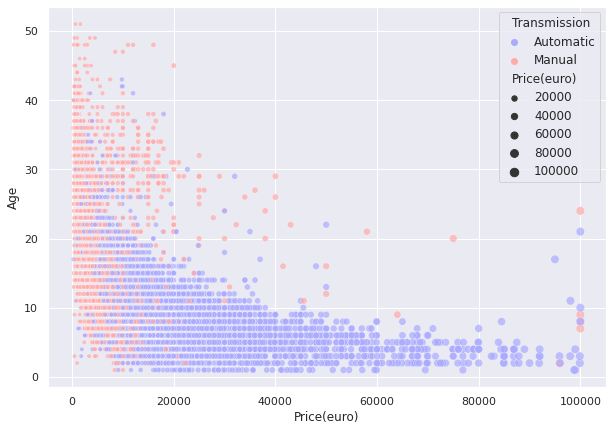

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Price(euro)", y="Age",
    hue="Transmission", 
    size = "Price(euro)", alpha = 0.7,
             palette='bwr'
    );

Теперь попробуем внести сюда категориальные признаки 

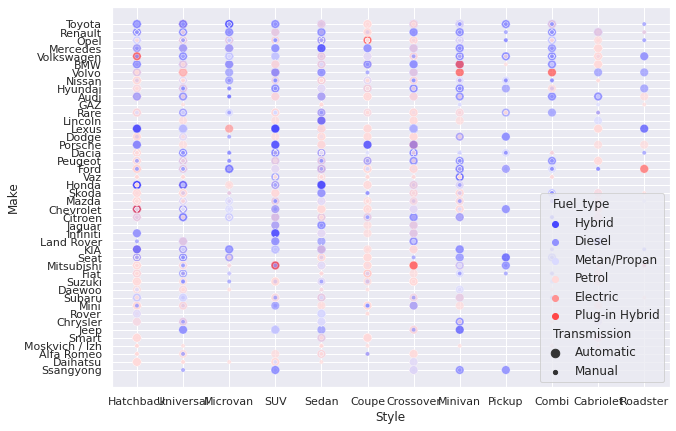

In [21]:
plt.figure(figsize=(10,7))
sns.scatterplot(    
    data=df,
    x="Style", y="Make",
    hue="Fuel_type", 
    size = "Transmission", alpha = 0.7,
             palette='bwr'
    );
    # получается что по х- идут стиль машины, по у- у нас производители, точками мы смотрим какой тип топлива и тип точки - какая у нее трансмиссия 

Давайте посмотрим  насколько дорогие машины у производителей

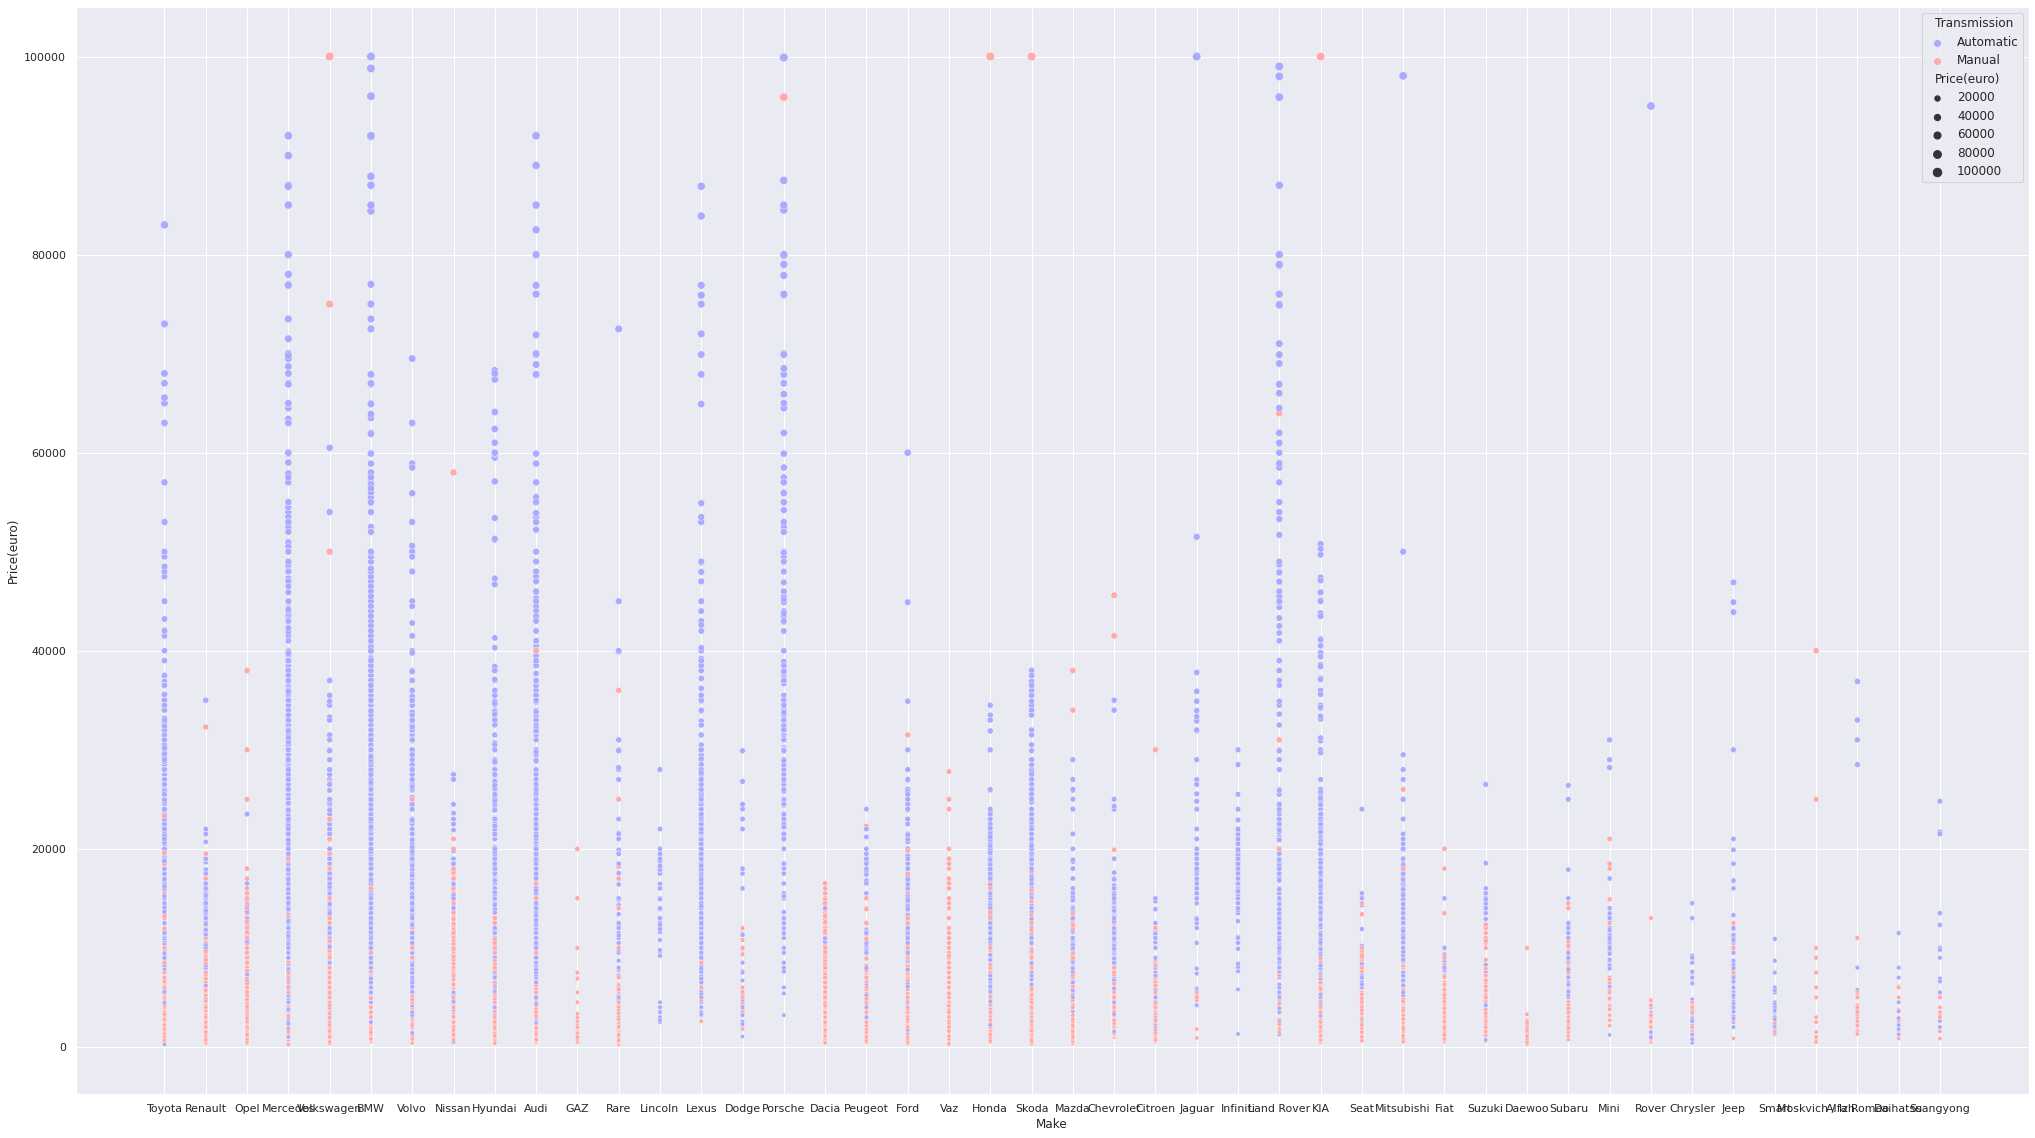

In [22]:
plt.figure(figsize=(35,20))
sns.scatterplot(    
    data=df,
    x="Make", y="Price(euro)",
    hue="Transmission", 
    size = "Price(euro)", alpha = 1,
             palette='bwr'
    );

Посмотрим на зависимость цены от типа трансмиссии 

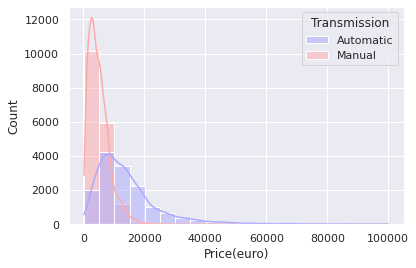

In [23]:
sns.histplot(data = df, 
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 20, kde = True,
             palette='bwr')


### Задание 2.1
Введите квантильные категории для столбца удельный пробег за год (km year). Чтобы были условно категории «с небольшим пробегом», «со средним пробегом» и «с большим пробегом»

Создаем big_km_year и заносим туда все данные у которых значение больше 20000

Создаем middle_km_year и заносим туда все данные у которых значение меньше 20000 и больше 10000

Создаем low_km_year и заносим туда все данные у которых значение меньше 10000 

In [24]:
big_km_year = df[df.km_year > 20000]
middle_km_year = df[(df.km_year < 20000)& ((df.km_year > 10000))]
low_km_year = df[df.km_year < 10000]

df['km_year']= df['km_year'].replace(low_km_year.index.values, 'low_km_year')
df['km_year']= df['km_year'].replace(big_km_year.index.values, 'big_km_year')
df['km_year']= df['km_year'].replace(middle_km_year.index.values, 'middle_km_year')


In [ ]:
middle_km_year

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,1,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,0,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,0,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,0,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,0,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32214,Skoda,Superb,2016,Cabriolet,78900.0,2000.0,Petrol,1,21000.0,6,13150.000000
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,1,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,0,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,0,7000.0,7,12714.285714


In [ ]:
low_km_year

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
7,Mercedes,Series (W124),1991,Sedan,240000.0,2300.0,Petrol,0,2850.0,31,7741.935484
19,GAZ,Rare,1992,Sedan,68000.0,2445.0,Petrol,0,2222.0,30,2266.666667
25,Dodge,Rare,2008,Hatchback,113486.0,1998.0,Metan/Propan,1,4495.0,14,8106.142857
26,Audi,100,1993,Sedan,235000.0,2000.0,Petrol,0,2950.0,29,8103.448276
43,Volkswagen,Passat,1991,Sedan,292000.0,1800.0,Petrol,0,1150.0,31,9419.354839
...,...,...,...,...,...,...,...,...,...,...,...
32187,Volkswagen,Vento,1994,Sedan,123456.0,1800.0,Metan/Propan,0,1590.0,28,4409.142857
32195,Dacia,Sandero,2011,Hatchback,99000.0,1200.0,Petrol,0,4200.0,11,9000.000000
32199,Rare,Altele,1995,Sedan,180000.0,1500.0,Diesel,0,2000.0,27,6666.666667
32207,Land Rover,Range Rover,2005,SUV,111122.0,2500.0,Diesel,1,8888.0,17,6536.588235


In [ ]:
big_km_year

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
5,Volkswagen,Passat,2010,Universal,290000.0,1390.0,Petrol,0,5600.0,12,24166.666667
15,Nissan,Qashqai,2011,Crossover,251000.0,1500.0,Diesel,0,8300.0,11,22818.181818
16,Hyundai,Matrix,2005,Universal,383000.0,1500.0,Diesel,0,3200.0,17,22529.411765
22,Mercedes,E Class,2014,Sedan,275500.0,2200.0,Diesel,1,18350.0,8,34437.500000
23,Lincoln,Rare,2017,Sedan,157000.0,1998.0,Hybrid,1,17800.0,5,31400.000000
...,...,...,...,...,...,...,...,...,...,...,...
32175,Mercedes,E Class,2010,Sedan,292300.0,2143.0,Diesel,1,12700.0,12,24358.333333
32190,Mercedes,E Class,2014,Sedan,320000.0,2143.0,Diesel,0,19000.0,8,40000.000000
32192,Volkswagen,Caddy,2013,Microvan,195000.0,200.0,Metan/Propan,0,9000.0,9,21666.666667
32205,Volkswagen,Passat,2016,Universal,180000.0,1800.0,Diesel,0,11500.0,6,30000.000000


In [44]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,low_km_year
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,big_km_year
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,low_km_year
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,middle_km_year
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,low_km_year


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 2.7+ MB


Но если делать такое распределение по отдельности, то мы сможем сделать сортировку только в одну группу, а потом у нас изменится тип данных на стринг и так уже не получится, поэтому надо все сделать сразу 

### Задание 2.2
«умная» замена на редкие категории. В этот раз делайте замену вида «редкий дорогой» и «редкий дешевый», чтобы условные УАЗики не попали в одну группу с Jaguar

In [26]:
df['Price(euro)']

0         7750.0
1         8550.0
2         6550.0
3         4100.0
4         3490.0
          ...   
32215    11500.0
32216     4400.0
32217     7000.0
32218     4000.0
32219     4000.0
Name: Price(euro), Length: 32220, dtype: float64

In [27]:
df[cat_columns].nunique() # смотрим сколько у нас повторений

Make             44
Model           136
Style            12
Fuel_type         6
Transmission      2
dtype: int64

In [28]:
counts = df.Make.value_counts()# делаем список с данными(кол-во сделанных машин производителем) и кол-вом их повторений 
counts

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   

In [29]:
rare =  counts[(counts.values < 25)] # смотрим сколько у нас данных с повторениями меньше 25 и делаем подних отдельный пунтк  Rare в списке, видими что таких 252
df['Make'] = df['Make'].replace(rare.index.values, 'Rare')
df.Make.value_counts()

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   

In [39]:
rare =  counts[(counts.values < 25)]
price_rare = df['Price(euro)'].values
expensive = df[(price_rare >= 10000)]
middle = df[(price_rare < 10000 ) & (price_rare >= 5000)]
cheap = df[(price_rare < 5000)]
if df['Make'].index.values == 'Rare':
  if expensive == True: 
    df['Make'] = df['Make'].replace(expensive.index.values, 'Expensive rare')
  if middle == True: 
    df['Make'] = df['Make'].replace(middle.index.values, 'middle rare')
  if cheap == True: 
    df['Make'] = df['Make'].replace(cheap.index.values, 'Cheap rare')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [41]:
df.Make.value_counts()

Volkswagen        3423
Toyota            3083
Mercedes          3015
BMW               2594
Renault           2346
Opel              1824
Skoda             1730
Audi              1546
Dacia             1344
Ford              1343
Nissan            1252
Hyundai           1216
Honda              893
KIA                655
Mitsubishi         614
Lexus              595
Volvo              575
Vaz                471
Mazda              439
Peugeot            388
Chevrolet          322
Citroen            295
Land Rover         285
Rare               252
Seat               239
Porsche            190
Fiat               183
Suzuki             153
Subaru             150
Rover               92
Chrysler            83
Jeep                77
Mini                72
Infiniti            67
Jaguar              64
Daewoo              63
Dodge               49
Lincoln             49
Alfa Romeo          38
Smart               33
Ssangyong           32
GAZ                 31
Moskvich / Izh      30
Daihatsu   

### Задание 3 

Стандартизация 

In [ ]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

In [ ]:
DF_scaled.to_csv('/content/cars_moldova_scaled.csv',index=False)

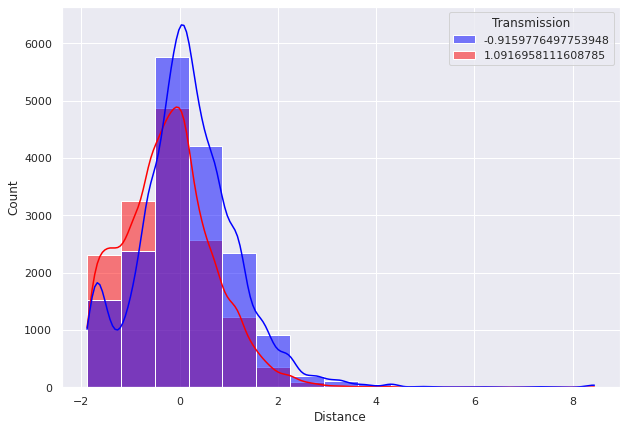

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_scaled, 
             x = 'Distance', 
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

Нормализация

In [ ]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

In [ ]:
DF_norm.to_csv('/content/cars_moldova_norm.csv',index=False)

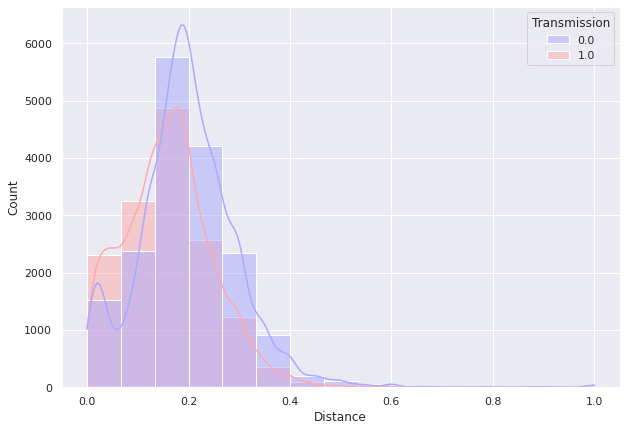

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_norm,
             x = 'Distance',
             hue = 'Transmission',
             bins = 15, kde = True,
             palette='bwr')

  Степенное преобразование 

In [ ]:
DF_power  = df.copy() 
DF_power[num_columns] = np.log(DF_power[num_columns])

M = DF_power[num_columns].mean()
STD = DF_power[num_columns].std()
DF_power[num_columns] = (DF_power[num_columns]-M)/STD


In [ ]:
DF_power.to_csv('/content/cars_moldova_power.csv',index=False)

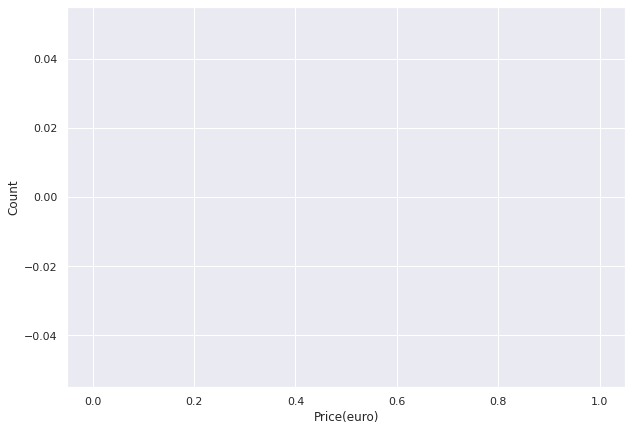

In [ ]:
fig = plt.figure(figsize=(10,7))
sns.histplot(data = DF_power, 
             x = 'Price(euro)', 
             hue = 'Transmission', 
             bins = 15, kde = True,
             palette='bwr')

One-hot encoding

In [ ]:
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)
df_ohe.tail()

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year,Big_km_Year,Midlle_km_Year,Low_km_Year,...,Style_Roadster,Style_SUV,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid
32215,2016,88000.0,1800.0,1,11500.0,6,14666.666667,False,False,True,...,0,0,1,0,0,0,0,0,1,0
32216,2002,225000.0,1800.0,0,4400.0,20,11250.000000,False,False,True,...,0,0,0,0,0,0,0,1,0,0
32217,2015,89000.0,1500.0,0,7000.0,7,12714.285714,False,False,True,...,0,0,0,1,1,0,0,0,0,0
32218,2006,370000.0,2000.0,0,4000.0,16,23125.000000,False,False,True,...,0,0,0,0,1,0,0,0,0,0
32219,2006,300000.0,1500.0,0,4000.0,16,18750.000000,False,False,True,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_ohe.to_csv('/content/cars_moldova_onehot.csv',index=False)

Кодирование многозначных признаков 

In [ ]:
df_se = df.copy()
df_se[cat_columns] = df_se[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df_se[column_name] =  df_se[column_name].cat.codes
df_se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  int8   
 1   Model                 32220 non-null  int16  
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  int8   
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  int8   
 7   Transmission          32220 non-null  int64  
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
 11  Big_km_Year           32220 non-null  bool   
 12  Midlle_km_Year        32220 non-null  bool   
 13  Low_km_Year           32220 non-null  bool   
dtypes: bool(3), float64(4), int16(1), int64(3), int8(3)
memory usage: 2.0 

In [ ]:
df_se.to_csv('/content/cars_moldova_cat_num.csv',index=False)